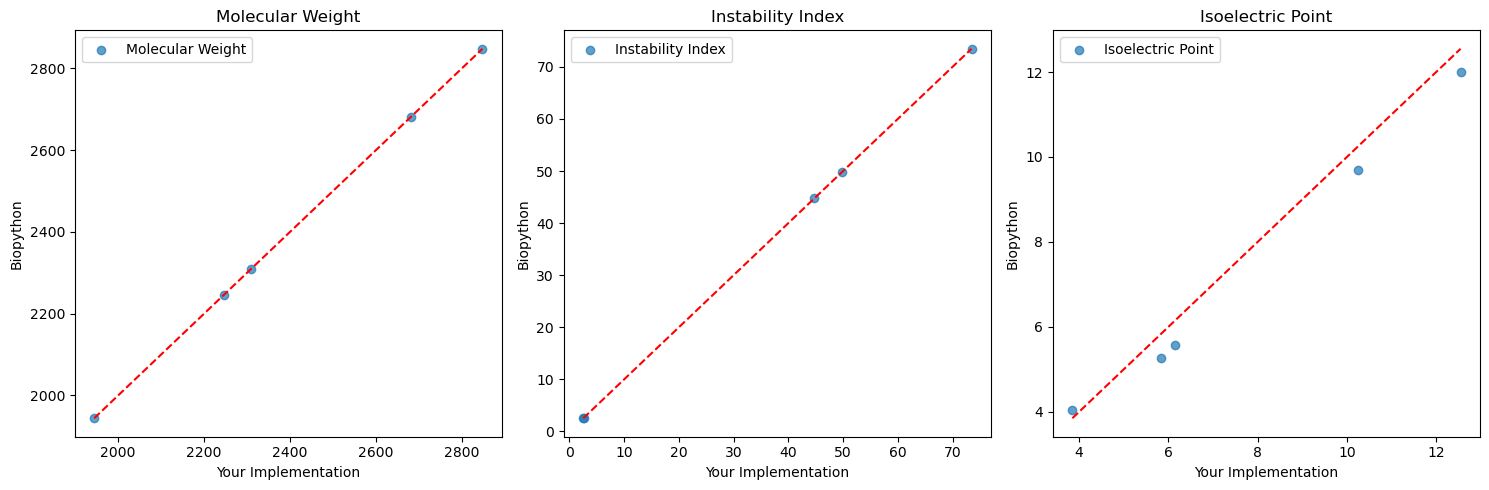

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Test dataset - a list of peptide sequences
test_sequences = [
    "MKTLLLTLVVVTIVCLDLGYT",
    "GIGAVLKVLTTGLPALISWIKRKRQQ",
    "MPSSVSWGILLLAGLCCLVPVS",
    "LLLTQIFEMLFLVLNSIYNAIVL",
    "MTPFNKSTKSYHPSTAF",
]

# Function to calculate properties using Biopython

def calculate_biopython_properties(sequence):
    analysed_seq = ProteinAnalysis(sequence)
    properties = {}
    properties["molecular_weight"] = analysed_seq.molecular_weight()
    properties["instability_index"] = analysed_seq.instability_index()
    properties["isoelectric_point"] = analysed_seq.isoelectric_point()
    return properties

# Function to calculate properties using your implementation
def calculate_physicochemical_features(sequence):
    sequence_Peptide_obj = peptides.Peptide(sequence)

    properties = {}
    properties["molecular_weight"] = sequence_Peptide_obj.molecular_weight(average="expasy")
    properties["instability_index"] = sequence_Peptide_obj.instability_index()
    properties["isoelectric_point"] = sequence_Peptide_obj.isoelectric_point(pKscale="EMBOSS")

    all_feature_values = []
    for value in properties.values():
        if isinstance(value, dict):
            all_feature_values.extend(value.values())
        else:
            all_feature_values.append(value)

    return np.array(all_feature_values, dtype=np.float32)

# Compare properties between your implementation and Biopython
original_properties = []
biopython_properties = []

for seq in test_sequences:
    original_features = calculate_physicochemical_features(seq)
    biopython_features = calculate_biopython_properties(seq)

    original_properties.append(original_features[:3])  # Select only comparable features
    biopython_properties.append([
        biopython_features["molecular_weight"],
        biopython_features["instability_index"],
        biopython_features["isoelectric_point"],
    ])

# Convert results to numpy arrays for plotting
original_properties = np.array(original_properties)
biopython_properties = np.array(biopython_properties)

# Plot comparison between original and Biopython properties
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
property_names = ["Molecular Weight", "Instability Index", "Isoelectric Point"]

for i, ax in enumerate(axes):
    ax.scatter(
        original_properties[:, i],
        biopython_properties[:, i],
        label=property_names[i],
        alpha=0.7,
    )
    ax.plot(
        [min(original_properties[:, i]), max(original_properties[:, i])],
        [min(original_properties[:, i]), max(original_properties[:, i])],
        "--",
        color="red",
    )
    ax.set_xlabel("Your Implementation")
    ax.set_ylabel("Biopython")
    ax.set_title(property_names[i])
    ax.legend()

plt.tight_layout()
plt.show()
